Calling All Autobots

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure

Function for histogram matching

In [31]:
# Function for histogram matching
def histogram_matching(source, template):
    matched = exposure.match_histograms(source, template, channel_axis=None)
    return matched

Read reference image and input image

In [20]:
# Read reference image and input image
reference_image_path = 'Images/training/drishtiGS_037.png'
fundus_image_path = 'Images/training/drishtiGS_017.png'

Load Images

In [21]:
# Load the images
reference_image = cv2.imread(reference_image_path)
fundus_image = cv2.imread(fundus_image_path)

# Convert images to grayscale
gray_reference = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.cvtColor(fundus_image, cv2.COLOR_BGR2GRAY)

Histogram Matching

In [22]:
# Perform histogram matching
matched_image = histogram_matching(gray_image, gray_reference)

1st Cropping

In [23]:
# Get the dimensions of the image
height, width, _ = fundus_image.shape

# Crop the image along the y-axis from 700 to 1400
# Taking the entire width for x-axis
fundus_cropped = matched_image[550:1300, 0:width]

Thresholding

In [24]:
# Apply thresholding
_, binary_image = cv2.threshold(fundus_cropped, 100, 255, cv2.THRESH_BINARY)

Opening Closing

In [25]:
# Perform morphological closing
kernel_open = np.ones((20, 20), np.uint8)
opened_image=cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel_open)
kernel_close = np.ones((100,100),np.uint8)
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel_close)

Convert closed_image to grayscale

In [26]:
# Convert closed_image to grayscale if it's not already in grayscale
if len(closed_image.shape) > 2:
    closed_image_gray = cv2.cvtColor(closed_image, cv2.COLOR_BGR2GRAY)
else:
    closed_image_gray = closed_image

# Ensure the image is in the correct format (CV_8UC1)
closed_image_uint8 = np.uint8(closed_image_gray)

Contours

In [27]:
# Find contours
contours, _ = cv2.findContours(closed_image_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if any contours were found
if not contours:
    raise ValueError("No contours found in the image")

# Get the largest contour
largest_contour = max(contours, key=cv2.contourArea)

2nd Cropping

In [28]:
# Get the bounding rectangle of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Ensure the crop area is within the image bounds
y1, y2 = max(0, y-30), min(fundus_cropped.shape[0], y+h+30)
x1, x2 = max(0, x-30), min(fundus_cropped.shape[1], x+w+30)

# Crop the image to the bounding rectangle
optic_disc_cropped = fundus_cropped[y1:y2, x1:x2]

Draw Contours

In [29]:
# Draw the contours on the original image
contour_image = fundus_cropped.copy()
cv2.drawContours(contour_image, [largest_contour], -1, (0, 255, 0), 2)

array([[1.06784348, 2.92056275, 2.92056275, ..., 2.04893988, 2.04893988,
        2.04893988],
       [0.02491096, 2.04893988, 2.04893988, ..., 2.04893988, 2.92056275,
        2.92056275],
       [2.04893988, 2.04893988, 2.04893988, ..., 2.92056275, 2.04893988,
        2.04893988],
       ...,
       [2.04893988, 2.04893988, 1.06784348, ..., 2.92056275, 2.04893988,
        2.04893988],
       [2.04893988, 2.04893988, 2.04893988, ..., 2.04893988, 2.04893988,
        1.06784348],
       [2.04893988, 2.04893988, 2.04893988, ..., 1.06784348, 1.06784348,
        1.06784348]])

SHOW SHOW SHOW

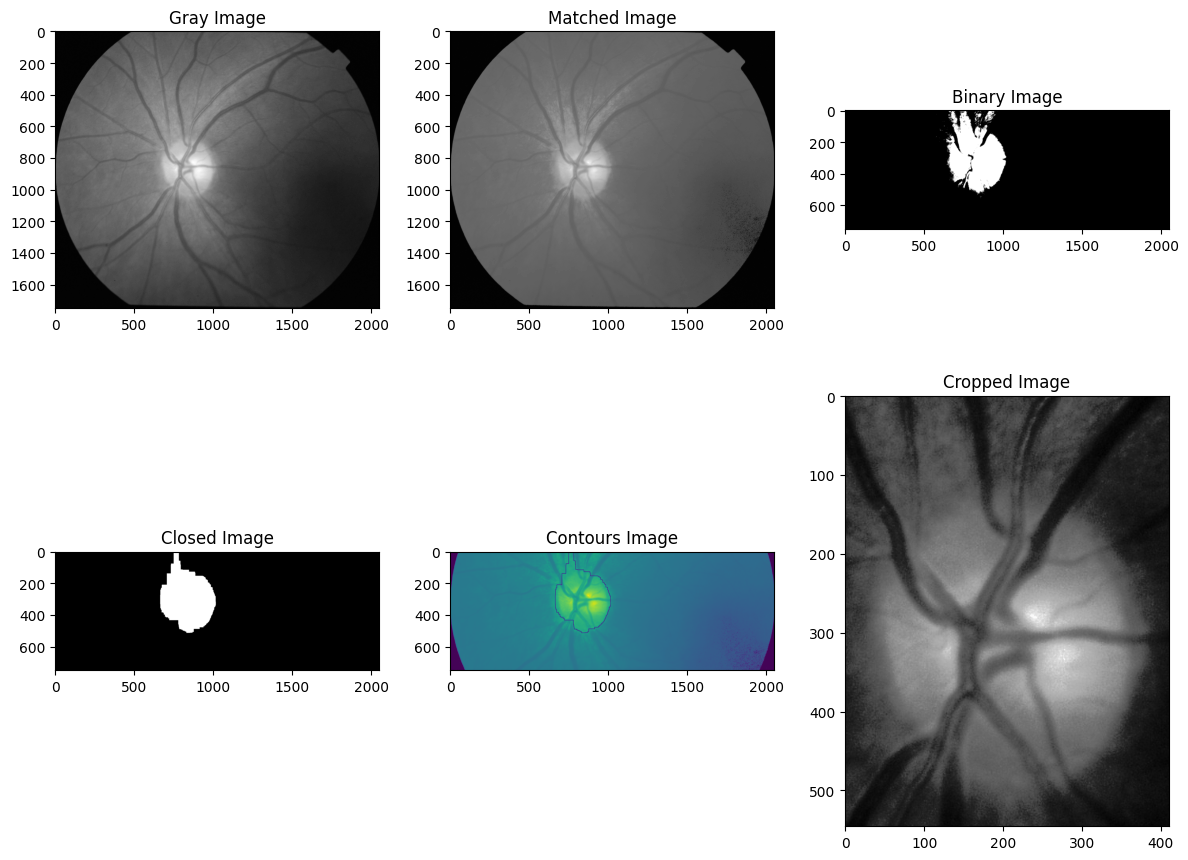

In [30]:
# Create a subplot with 3 rows and 2 columns
plt.figure(figsize=(12, 10))

# Plot the original image
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')

# Plot the gray image
plt.subplot(2, 3, 2)
plt.imshow(matched_image, cmap='gray')
plt.title('Matched Image')

# Plot the binary image
plt.subplot(2, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')

# Plot the closed image
plt.subplot(2, 3, 4)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')

# Add these lines after drawing contours and cropping images

# Plot the contours image
plt.subplot(2, 3, 5)
plt.imshow(contour_image)#cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours Image')

# Plot the cropped image
plt.subplot(2, 3, 6)
plt.imshow(optic_disc_cropped, cmap='gray')
plt.title('Cropped Image')

plt.tight_layout()
plt.show()